# Evaluation of Baselines

@Jen, fyi die Namen von den Klassen sind ganz unten im Notebook, weil die etwas bulky sind :D

In [1]:
from sklearn.metrics import f1_score
import pandas as pd
from matplotlib.pyplot import figure

In [2]:
roberta_res = pd.read_csv('../../../../src/data/schemafiltereddata/roberta_predict_results_None.txt', sep='\t')

In [3]:
distilbert_res = pd.read_csv('../../../../src/data/schemafiltereddata/distilbert_predict_results_None.txt', sep='\t')

In [4]:
bert_res = pd.read_csv('../../../../src/data/schemafiltereddata/bert_predict_results_None.txt', sep='\t')

In [5]:
#res = pd.read_csv("predict_results_None_tinybert_large_2epochs.txt", sep="\t")

In [6]:
tinybert_res = pd.read_csv("predict_results_None_tinybert_large_25epochs.txt", sep="\t")

In [7]:
small_tinybert = pd.read_csv("predict_results_tinybert_small.txt", sep="\t")

In [8]:
tinybert_res.drop('index', axis=1, inplace=True)

In [9]:
real = pd.read_csv('../../../../src/data/schemafiltereddata/TrainTestTables/test_tables_9000_prepped.csv')

### F1 Scores

In [49]:
#roberta
f1_score(roberta_res.prediction, real.label, average='micro')

0.8030199177485686

In [50]:
# distilbert
f1_score(distilbert_res.prediction, real.label, average='micro')

0.8019312958632369

In [51]:
# bert
f1_score(bert_res.prediction, real.label, average='micro')

0.8014071445851141

In [52]:
# tinybert large - 25 epochs
f1_score(tinybert_res.prediction, real.label, average='micro')

0.7592532860253205

In [53]:
# tinybert small - 25 epochs
f1_score(small_tinybert.prediction, real.label, average='micro')

0.7592532860253205

### Evaluation of Results

Create dataset

In [10]:
# we join the predictions to the test dataset to compare them
real['tinybert_pred'] = tinybert_res.prediction

In [11]:
real['roberta_pred'] = roberta_res.prediction

In [12]:
real['bert_pred'] = bert_res.prediction

In [13]:
real['distilbert_pred'] = distilbert_res.prediction

In [14]:
real.drop(['Unnamed: 0'], axis=1, inplace=True)

In [15]:
real

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred
0,Comedy Improv at Arts Garage 2020-12-10 Shows ...,130,135,130,130,130
1,2020-12-10T21 30 00-05 00 2020-12-10T21 30 00-...,68,68,68,68,68
2,name Arts Garage name Bob Carter 8217 s Actor...,115,115,115,115,115
3,name Mod 27 Improv telephone 561-223-1651 ema...,153,153,153,153,153
4,My Front Door Lord Have Mercy Sold Out Wedding...,134,134,134,134,134
...,...,...,...,...,...,...
49599,url https eutrade-shop com epages f7e4b224-a2...,147,147,147,147,147
49600,4 5 5 3 5 5 5 4 3 5 3 5 5 5 3 5 1 5 5 4 3 3 5 ...,38,169,186,169,186
49601,http schema org NewCondition http schema org N...,108,108,108,108,108
49602,4313042590504 0 4313042595028 0 4313042595066 ...,85,191,85,85,85


In [23]:
real.label.max()

201

In [24]:
real[real['label']==1]

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred
5931,Yes Not Available No Yes Yes Yes Yes Not Avail...,1,1,87,127,1
20646,Reservations Reservations Reservations Reserva...,1,131,127,164,164
23679,True True True True True True True True True T...,1,1,120,120,1
45460,Yes Yes Yes Yes Yes Yes Yes Yes Yes Yes Yes Ye...,1,1,1,1,1


In [25]:
for i in range(0, 201):
    print('Label:', i)
    print('tinybert:', f1_score(real[real['label']==i].label, real[real['label']==i].tinybert_pred, average='micro'))
    print('roberta:', f1_score(real[real['label']==i].label, real[real['label']==i].roberta_pred, average='micro'))
    print('bert:', f1_score(real[real['label']==i].label, real[real['label']==i].bert_pred, average='micro'))
    print('distilbert:', f1_score(real[real['label']==i].label, real[real['label']==i].distilbert_pred, average='micro'))
    
    

Label: 0
tinybert: 0.967741935483871
roberta: 0.967741935483871
bert: 0.967741935483871
distilbert: 0.967741935483871
Label: 1
tinybert: 0.75
roberta: 0.25
bert: 0.25
distilbert: 0.75
Label: 2
tinybert: 0.9390243902439024
roberta: 0.9512195121951219
bert: 0.9573170731707317
distilbert: 0.9512195121951219
Label: 3
tinybert: 0.9280575539568345
roberta: 0.9568345323741008
bert: 0.9568345323741008
distilbert: 0.9496402877697842
Label: 4
tinybert: 0.4727272727272727
roberta: 0.6363636363636364
bert: 0.5909090909090909
distilbert: 0.6
Label: 5
tinybert: 0.7088948787061995
roberta: 0.9164420485175202
bert: 0.9056603773584906
distilbert: 0.894878706199461
Label: 6
tinybert: 0.3387096774193548
roberta: 0.17741935483870971
bert: 0.24193548387096775
distilbert: 0.20967741935483872
Label: 7
tinybert: 0.3333333333333333
roberta: 0.14285714285714285
bert: 0.2857142857142857
distilbert: 0.3333333333333333
Label: 8
tinybert: 0.31666666666666665
roberta: 0.0
bert: 0.03333333333333333
distilbert: 0.2666

roberta: 0.0
bert: 0.1111111111111111
distilbert: 0.0
Label: 82
tinybert: 0.09090909090909091
roberta: 0.0
bert: 0.0
distilbert: 0.0
Label: 83
tinybert: 0.9666666666666667
roberta: 0.975
bert: 0.975
distilbert: 0.9666666666666667
Label: 84
tinybert: 0.5163043478260869
roberta: 0.6195652173913043
bert: 0.6195652173913043
distilbert: 0.5706521739130435
Label: 85
tinybert: 0.6858638743455497
roberta: 0.7722513089005235
bert: 0.7827225130890052
distilbert: 0.7931937172774869
Label: 86
tinybert: 0.05555555555555555
roberta: 0.0
bert: 0.0
distilbert: 0.0
Label: 87
tinybert: 0.3858267716535433
roberta: 0.3543307086614173
bert: 0.3858267716535433
distilbert: 0.37795275590551175
Label: 88
tinybert: 0.14285714285714285
roberta: 0.0
bert: 0.0
distilbert: 0.03296703296703297
Label: 89
tinybert: 0.6666666666666666
roberta: 0.6666666666666666
bert: 0.6666666666666666
distilbert: 0.6666666666666666
Label: 90
tinybert: 0.3333333333333333
roberta: 1.0
bert: 1.0
distilbert: 1.0
Label: 91
tinybert: 0.281

distilbert: 0.6274509803921569
Label: 164
tinybert: 0.8440860215053764
roberta: 0.8870967741935484
bert: 0.8817204301075269
distilbert: 0.8709677419354839
Label: 165
tinybert: 0.0851063829787234
roberta: 0.0
bert: 0.0
distilbert: 0.06382978723404255
Label: 166
tinybert: 0.6274509803921569
roberta: 0.6666666666666666
bert: 0.7254901960784313
distilbert: 0.7254901960784313
Label: 167
tinybert: 0.4505327245053272
roberta: 0.2191780821917808
bert: 0.4916286149162861
distilbert: 0.3318112633181126
Label: 168
tinybert: 0.1875
roberta: 0.0
bert: 0.0
distilbert: 0.0
Label: 169
tinybert: 0.7948717948717948
roberta: 0.8461538461538461
bert: 0.8205128205128205
distilbert: 0.8717948717948718
Label: 170
tinybert: 0.9466666666666667
roberta: 0.96
bert: 0.9511111111111111
distilbert: 0.9666666666666667
Label: 171
tinybert: 0.8927536231884058
roberta: 0.9130434782608695
bert: 0.9217391304347826
distilbert: 0.927536231884058
Label: 172
tinybert: 0.8686006825938567
roberta: 0.9931740614334471
bert: 0.99

Which test colums are especially often misclassified?

In [21]:
real[real['label'] != real['tinybert_pred']].label.value_counts().sort_index() / real.label.value_counts().sort_index()

0      0.032258
1      0.250000
2      0.060976
3      0.071942
4      0.527273
         ...   
197         NaN
198    0.375000
199    0.067797
200    0.073604
201    1.000000
Name: label, Length: 202, dtype: float64

In [22]:
relative_fails = (real[real['label'] != real['tinybert_pred']].label.value_counts().sort_index() / real.label.value_counts().sort_index())

In [23]:
relative_fails.sort_values().tail(15)

72     0.969697
180    1.000000
92     1.000000
109    1.000000
57     1.000000
49     1.000000
118    1.000000
144    1.000000
18     1.000000
146    1.000000
201    1.000000
102         NaN
103         NaN
155         NaN
197         NaN
Name: label, dtype: float64

<AxesSubplot:>

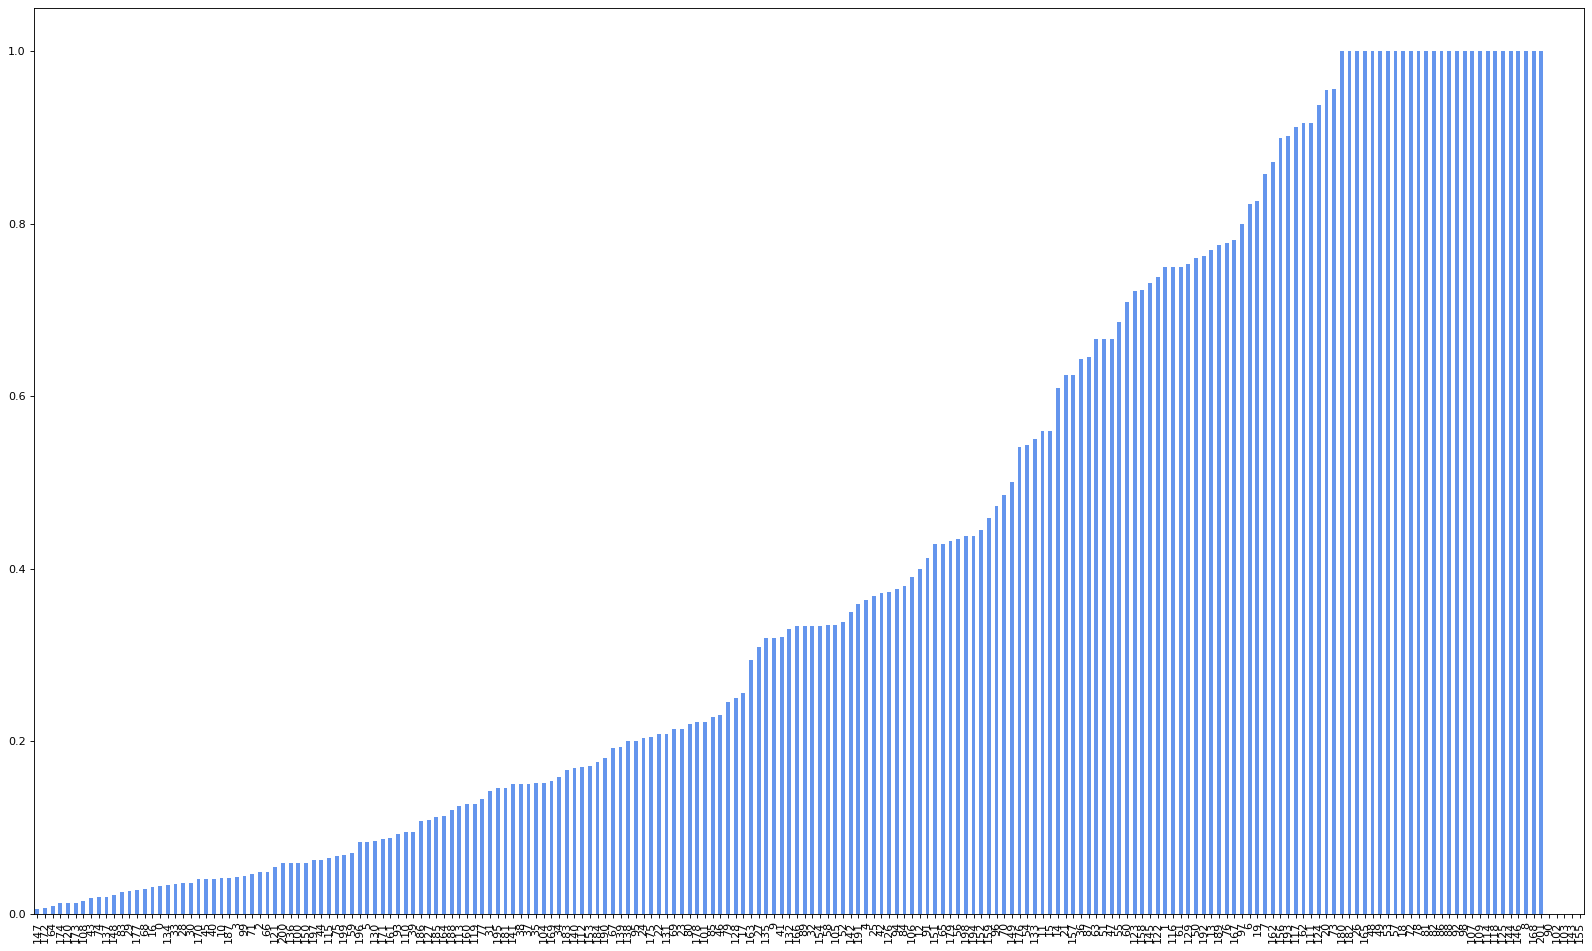

In [36]:

figure(figsize=(25, 15), dpi=80)
relative_fails.sort_values().plot(kind='bar', color='cornflowerblue')

<AxesSubplot:>

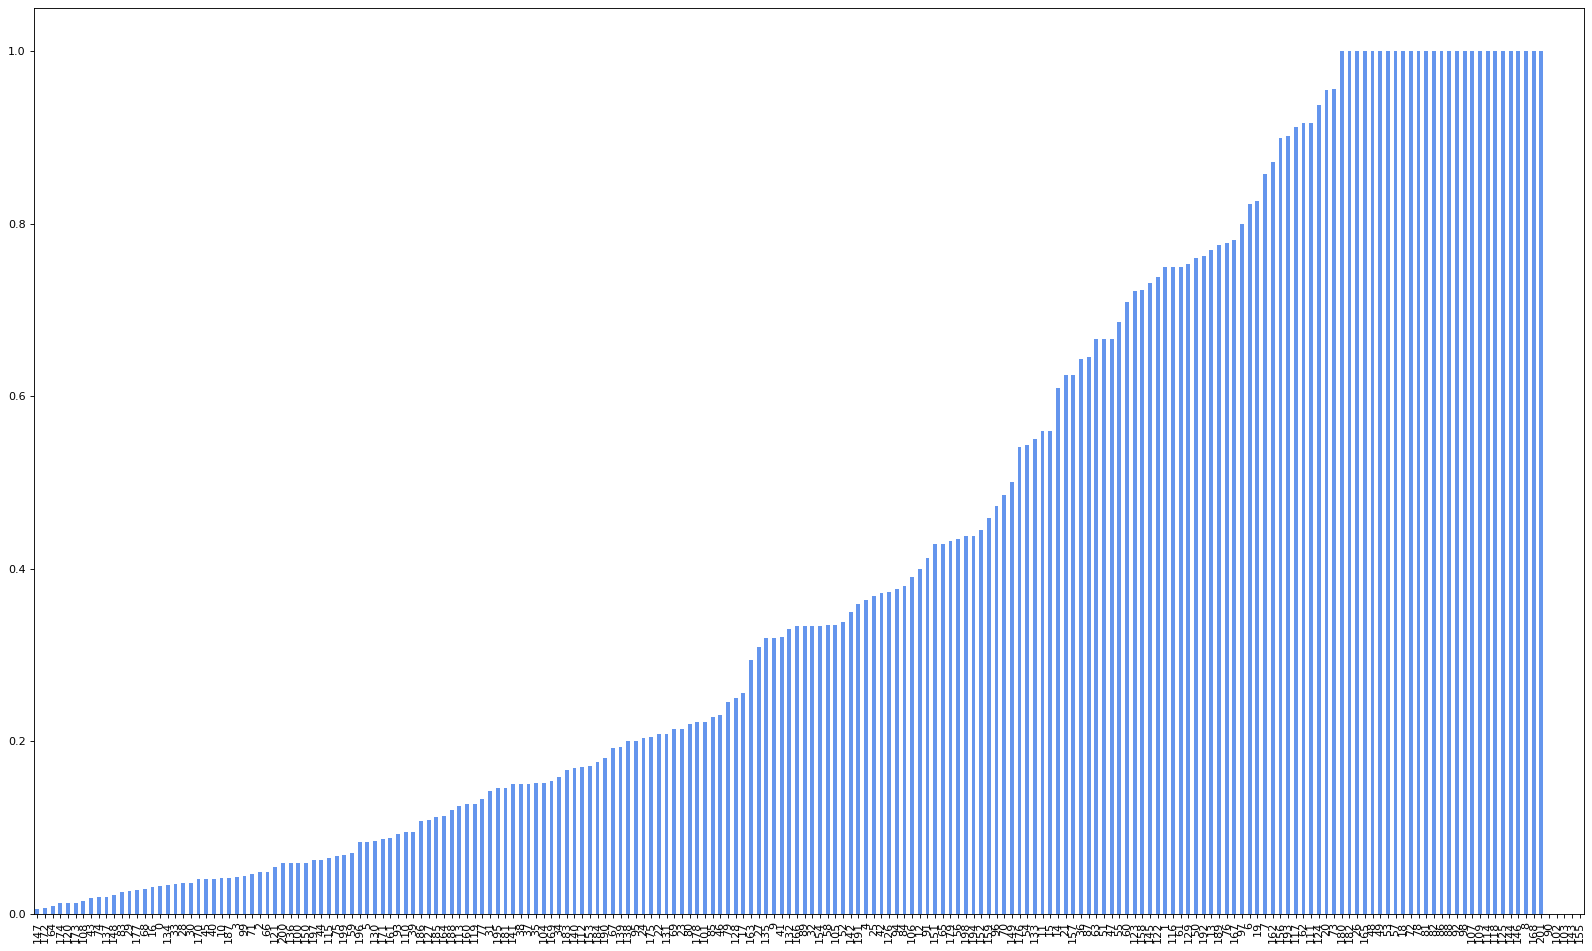

In [35]:
relative_fails = (real[real['label'] != real['roberta_pred']].label.value_counts().sort_index() / real.label.value_counts().sort_index())
figure(figsize=(25, 15), dpi=80)
relative_fails.sort_values().plot(kind='bar', color='cornflowerblue')

<AxesSubplot:>

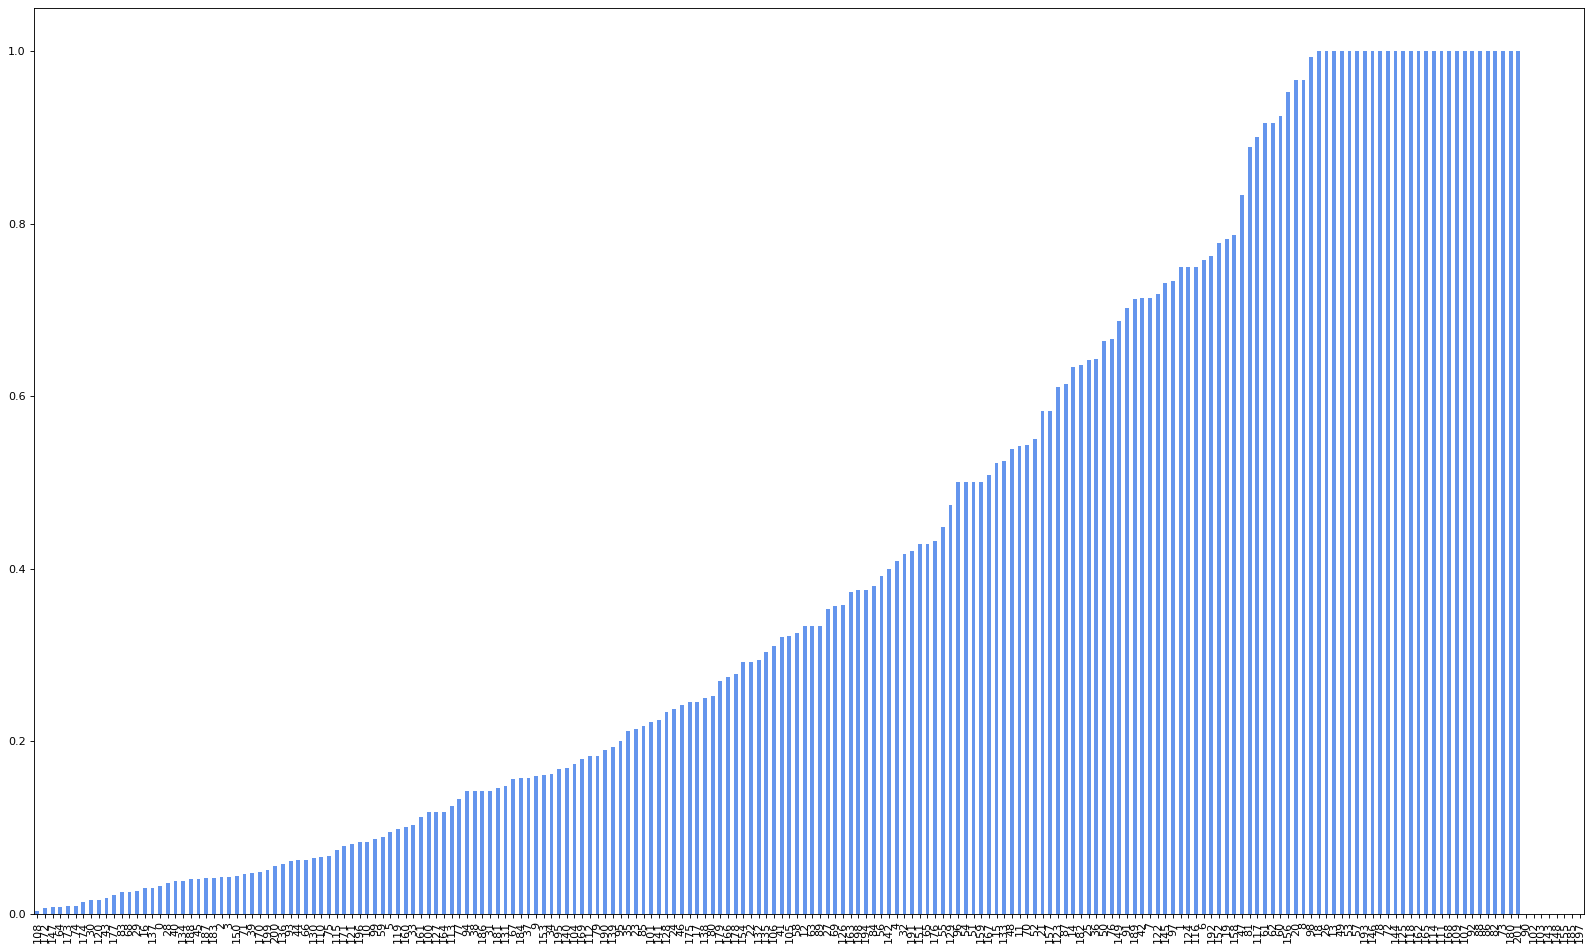

In [34]:
relative_fails = (real[real['label'] != real['bert_pred']].label.value_counts().sort_index() / real.label.value_counts().sort_index())
figure(figsize=(25, 15), dpi=80)
relative_fails.sort_values().plot(kind='bar', color='cornflowerblue')

<AxesSubplot:>

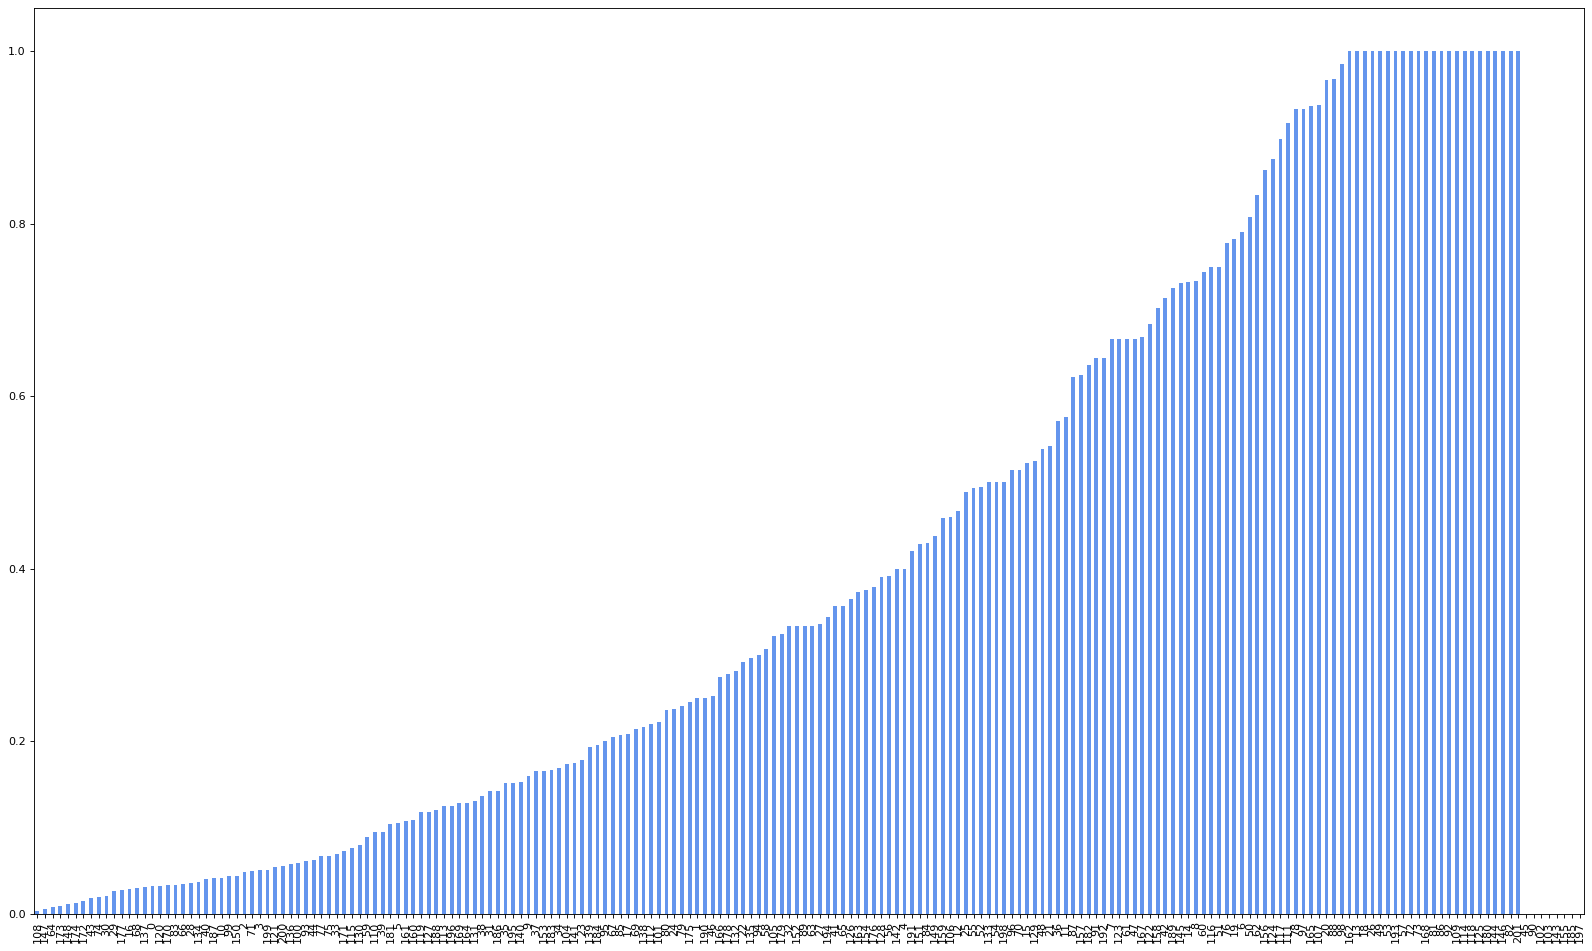

In [33]:
relative_fails = (real[real['label'] != real['distilbert_pred']].label.value_counts().sort_index() / real.label.value_counts().sort_index())
figure(figsize=(25, 15), dpi=80)
relative_fails.sort_values().plot(kind='bar', color='cornflowerblue')

In [ ]:
relative_fails.sort_values().plot()

In [74]:
relative_fails.sort_values().head(40)

143    0.003344
108    0.004451
64     0.011163
173    0.011494
147    0.016033
43     0.018182
174    0.020654
29     0.027027
74     0.028846
0      0.032258
83     0.033333
28     0.035714
68     0.035787
30     0.036290
177    0.039773
99     0.043478
137    0.048209
120    0.053279
170    0.053333
121    0.054054
40     0.057906
71     0.058577
2      0.060976
93     0.061538
134    0.062100
44     0.062500
148    0.065217
199    0.067797
151    0.071429
16     0.071550
3      0.071942
200    0.073604
45     0.080000
59     0.082840
150    0.088235
33     0.103448
171    0.107246
115    0.110212
136    0.114392
100    0.117647
Name: label, dtype: float64

In [57]:
# nas are perfectly classified
relative_fails.sort_values().tail(40)

157    0.750000
61     0.750000
116    0.750000
107    0.750000
98     0.768657
168    0.812500
21     0.833333
47     0.833333
62     0.833333
81     0.833333
129    0.842105
13     0.846154
78     0.850000
88     0.857143
124    0.875000
76     0.888889
26     0.900000
193    0.901639
82     0.909091
165    0.914894
111    0.916667
114    0.925926
86     0.944444
53     0.950000
73     0.956522
72     0.969697
180    1.000000
92     1.000000
109    1.000000
57     1.000000
49     1.000000
118    1.000000
144    1.000000
18     1.000000
146    1.000000
201    1.000000
102         NaN
103         NaN
155         NaN
197         NaN
Name: label, dtype: float64

- 180    reviewsProduct
- 92     headlineRecipe
- 109    itemlistelementProduct
- 57     datepublishedProduct
- 49     copyrightyearCreativeWork
- 118    mainentityofpageCreativeWork
- 144    weightProduct
- 18     aggregateratingRecipe
- 146    offersBook
- 201    founderLocalBusiness

In [67]:
real[real['label']==180]
# reviewsProduct 

,Unnamed: 0,text,label,pred
1216,1216,reviewbody Fabian was great to deal with and ...,180,176
33054,33054,datepublished 2019-08-06 14 06 31 author Mich...,180,176
40775,40775,datepublished 2017-11-08 description I work w...,180,177
48620,48620,name The perfect level of calories for a deli...,180,178


In [60]:
real[real['label']==180]

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred
1216,reviewbody Fabian was great to deal with and ...,180,176,176,176,176
33054,datepublished 2019-08-06 14 06 31 author Mich...,180,176,177,177,177
40775,datepublished 2017-11-08 description I work w...,180,177,177,177,177
48620,name The perfect level of calories for a deli...,180,178,178,178,178


In [59]:
real[real['label']==201]

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred
2919,jobtitle Manager telephone 918037405009 name ...,201,153,47,153,153
25829,BIZE G rald SZYMANSKI Stephanie BERTRAND Marie...,201,83,83,34,83


In [68]:
real[real['label']==92]
# headlineRecipe wird oft verwechselt mit 137 -> nameRecipe

,Unnamed: 0,text,label,pred
2656,2656,Lemony Angel Hair Pasta with Crab Turkey Spina...,92,137
2904,2904,O melhor biscoito de chocolate do mundo saiba...,92,173
5005,5005,Black Pepper Biscuits with Sweet Corn and Saus...,92,137
9394,9394,PINEAPPLE COCONUT SMOOTHIE SALTED CARAMEL SMOO...,92,137
11470,11470,Chicken Samosas with Cilantro-Yogurt Dip Blanc...,92,137
28259,28259,Grilled Buffalo Wings with Avocado Blue Cheese...,92,137
30805,30805,Hummingbird Cake Loaded Bacon and Cheddar Bake...,92,137
31179,31179,Jack Monroe s Paddington Bear sponge puddings ...,92,137
35774,35774,Creamy boccoli pasta with loads of green peas ...,92,137
37645,37645,Gluten Free Coconut Shrimp Cheesy Eggs-in-a-cu...,92,137


In [37]:
real[real['label']==92]

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred
2656,Lemony Angel Hair Pasta with Crab Turkey Spina...,92,137,137,137,137
2904,O melhor biscoito de chocolate do mundo saiba...,92,173,173,137,137
5005,Black Pepper Biscuits with Sweet Corn and Saus...,92,137,137,137,137
9394,PINEAPPLE COCONUT SMOOTHIE SALTED CARAMEL SMOO...,92,137,137,137,137
11470,Chicken Samosas with Cilantro-Yogurt Dip Blanc...,92,137,137,137,137
28259,Grilled Buffalo Wings with Avocado Blue Cheese...,92,137,137,137,137
30805,Hummingbird Cake Loaded Bacon and Cheddar Bake...,92,137,137,137,137
31179,Jack Monroe s Paddington Bear sponge puddings ...,92,137,137,137,137
35774,Creamy boccoli pasta with loads of green peas ...,92,137,137,137,137
37645,Gluten Free Coconut Shrimp Cheesy Eggs-in-a-cu...,92,137,137,137,137


In [38]:
real[real['label']==137]

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred
7,Sinigang Na Buntot ng Baboy Low Carb Katsu Cur...,137,137,137,137,137
17,Peach Cake Recipe using Fresh Peaches Canned G...,137,137,137,137,137
46,Whisky Woodland Punch FLAVORS OF THE FAR EAST ...,137,137,137,137,137
69,Cranberry S mores Chocolate-Wrapped Present Ca...,137,137,137,137,137
123,BAKED VADA PAV - MUMBAI STYLE Jasmine sharbat ...,137,137,137,137,137
...,...,...,...,...,...,...
49341,Chicken Tortilla Soup Simple and Tasty Refried...,137,137,137,137,137
49358,Pita Bread Sweet Pepper Semolina Bread Motley ...,137,137,136,137,137
49391,Lemon Bars Strawberry Orange Sorbet Curried Ch...,137,137,137,137,137
49432,Beef Vegetable Soup Recipe SARABASAB Vegetable...,137,112,137,137,137


In [27]:
real[real['label']==146]
# 146 often confused with 147

,Unnamed: 0,text,label,pred
9234,9234,price US 122 00 price US 400 00 price US 400 ...,146,147
10476,10476,price free-with-the-core availability instock...,146,145
14796,14796,price 265 00 pricecurrency USD price 395 00 p...,146,147
15032,15032,price 10 00 pricecurrency USD price 20 00 pri...,146,106
16068,16068,pricecurrency USD price 3 24 availability InS...,146,147
16585,16585,price 0 00 pricecurrency USD price 10 50 pric...,146,147
26628,26628,availability http schema org InStock name tud...,146,147
29510,29510,price 0 price 0 price 0 price 0 price 0 price...,146,147
39596,39596,seller comiXology seller comiXology seller Co...,146,34
47573,47573,pricecurrency USD price 9 95 pricecurrency US...,146,147


In [69]:
real[real['label']==197]
# NANs are perfectly classified

,Unnamed: 0,text,label,pred
891,891,All Ages 18 All Ages All Ages All Ages All Ag...,197,197
8783,8783,ALL AGES Kid Friendly ALL AGES ALL AGES ALL AG...,197,197
14275,14275,All Ages All Ages All Ages All Ages All Ages ...,197,197
17019,17019,All Ages All Ages All Ages All Ages All Ages A...,197,197
19561,19561,20-88 24-80 23-85 21-87 20-78 23-90 21-85 25-8...,197,197
26060,26060,21 21 All Ages No Minors 21 21 All Ages 21 21 ...,197,197
26814,26814,No Minors No Minors No Minors No Minors No Min...,197,197
28262,28262,All Ages Licensed No Minors No Minors No Minor...,197,197
29690,29690,16- 16- 16- 16- 16- 16- 16- 16- 16- 16- 16- 16...,197,197
34131,34131,All Ages Licensed All Ages No Minors All Ages ...,197,197


Was passiert mit leerem Text -> wird immer zu 164 klassifiziert??

In [72]:
real[real['text']==" "]
# 164 -> pricerangeLocalBusiness

,Unnamed: 0,text,label,pred
100,100,,164,164
107,107,,164,164
192,192,,189,164
199,199,,165,164
810,810,,189,164
...,...,...,...,...
48636,48636,,164,164
48697,48697,,163,164
48963,48963,,164,164
49595,49595,,25,164


In [8]:
# test set has in general weird values for 164 
real[real['label']==164].text.value_counts()

In [73]:
real[real['text']==" "].pred.value_counts()

164    151
Name: pred, dtype: int64

What columns are they misclassified with?

<AxesSubplot:ylabel='label,pred'>

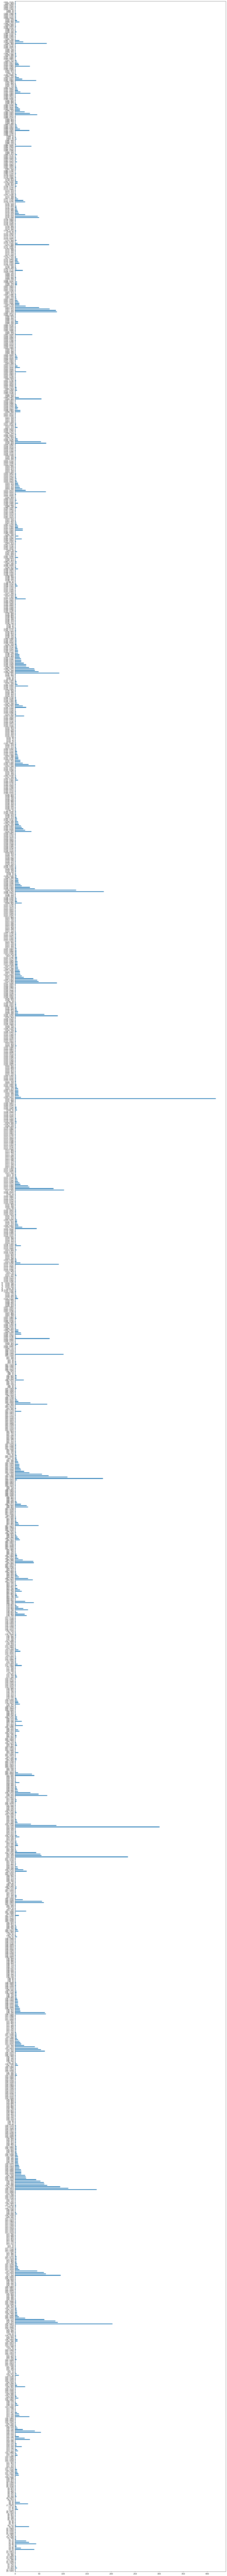

In [29]:
figure(figsize=(20, 250), dpi=80)
real[real['label'] != real['pred']].groupby('label').pred.value_counts().plot(kind='barh')

In [27]:
print(real[real['label'] != real['pred']].groupby('label').pred.value_counts())

label  pred
0      142     1
1      131     1
2      83      4
       24      2
       37      1
              ..
200    141     1
       156     1
       163     1
201    83      1
       153     1
Name: pred, Length: 1800, dtype: int64


What are possible reasons for this misclassification -> data type, values of columns (e.g. empty, random etc.)

In [60]:
labels_new = {'worstratingProduct': 0,
 'acceptsreservationsRestaurant': 1,
 'additionalnamePerson': 2,
 'additionalpropertyProduct': 3,
 'addressHotel': 4,
 'addressLocalBusiness': 5,
 'addressPerson': 6,
 'addressProduct': 7,
 'addressRestaurant': 8,
 'addresslocalityLocalBusiness': 9,
 'addressregionLocalBusiness': 10,
 'affiliationPerson': 11,
 'aggregateratingBook': 12,
 'aggregateratingCreativeWork': 13,
 'aggregateratingHotel': 14,
 'aggregateratingLocalBusiness': 15,
 'aggregateratingProduct': 16,
 'aggregateratingRecipe': 17,
 'aggregateratingRestaurant': 18,
 'alternatenameProduct': 19,
 'alternativeheadlineCreativeWork': 20,
 'areaservedLocalBusiness': 21,
 'articlebodyCreativeWork': 22,
 'audienceProduct': 23,
 'authorBook': 24,
 'authorCreativeWork': 25,
 'authorProduct': 26,
 'authorRecipe': 27,
 'availabilityProduct': 28,
 'bestratingProduct': 29,
 'birthdatePerson': 30,
 'birthplacePerson': 31,
 'bookeditionBook': 32,
 'bookformatBook': 33,
 'brandProduct': 34,
 'breadcrumbProduct': 35,
 'byartistMusicAlbum': 36,
 'byartistMusicRecording': 37,
 'categoryProduct': 38,
 'citystatezipLocalBusiness': 39,
 'colorProduct': 40,
 'commentcountCreativeWork': 41,
 'conditionProduct': 42,
 'contactpointLocalBusiness': 43,
 'contactpointPerson': 44,
 'cookingmethodRecipe': 45,
 'cooktimeRecipe': 46,
 'copyrightholderCreativeWork': 47,
 'copyrightyearCreativeWork': 48,
 'creatorCreativeWork': 49,
 'datecreatedCreativeWork': 50,
 'datecreatedMusicRecording': 51,
 'datemodifiedCreativeWork': 52,
 'datemodifiedRecipe': 53,
 'datepublishedBook': 54,
 'datepublishedCreativeWork': 55,
 'datepublishedMusicRecording': 56,
 'datepublishedProduct': 57,
 'datepublishedRecipe': 58,
 'deathdatePerson': 59,
 'depthProduct': 60,
 'disambiguatingdescriptionProduct': 61,
 'doortimeEvent': 62,
 'durationEvent': 63,
 'durationMusicRecording': 64,
 'emailHotel': 65,
 'emailLocalBusiness': 66,
 'emailPerson': 67,
 'enddateEvent': 68,
 'episodenumberTVEpisode': 69,
 'worksforPerson': 70,
 'familynamePerson': 71,
 'faxnumberLocalBusiness': 72,
 'faxnumberPerson': 73,
 'genderPerson': 74,
 'genreBook': 75,
 'genreCreativeWork': 76,
 'genreMusicRecording': 77,
 'geoHotel': 78,
 'geoLocalBusiness': 79,
 'geoPlace': 80,
 'geoProduct': 81,
 'geoRestaurant': 82,
 'givennamePerson': 83,
 'gtin12Product': 84,
 'gtin13Product': 85,
 'gtin14Product': 86,
 'gtin8Product': 87,
 'gtinProduct': 88,
 'hasmapLocalBusiness': 89,
 'hasmenuRestaurant': 90,
 'headlineCreativeWork': 91,
 'headlineRecipe': 92,
 'heightPerson': 93,
 'heightProduct': 94,
 'homelocationPerson': 95,
 'identifierProduct': 96,
 'worklocationPerson': 97,
 'ingredientsRecipe': 98,
 'inlanguageBook': 99,
 'inlanguageCreativeWork': 100,
 'interactioncountCreativeWork': 101,
 'interactionstatisticCreativeWork': 102,
 'interactiontypeCreativeWork': 103,
 'isbnBook': 104,
 'ispartofRecipe': 105,
 'isrelatedtoProduct': 106,
 'issimilartoProduct': 107,
 'itemconditionProduct': 108,
 'itemlistelementProduct': 109,
 'jobtitlePerson': 110,
 'keywordsCreativeWork': 111,
 'keywordsRecipe': 112,
 'knowslanguagePerson': 113,
 'legalnameLocalBusiness': 114,
 'locationEvent': 115,
 'locationLocalBusiness': 116,
 'mainentityofpageCreativeWork': 117,
 'mainentityofpagePerson': 118,
 'mainentityofpageProduct': 119,
 'mainentityofpageRecipe': 120,
 'makesofferPerson': 121,
 'manufacturerProduct': 122,
 'materialProduct': 123,
 'memberofPerson': 124,
 'menuRestaurant': 125,
 'modelProduct': 126,
 'mpnProduct': 127,
 'nameBook': 128,
 'nameCreativeWork': 129,
 'nameEvent': 130,
 'nameHotel': 131,
 'nameLocalBusiness': 132,
 'nameMusicAlbum': 133,
 'nameMusicRecording': 134,
 'namePlace': 135,
 'nameProduct': 136,
 'nameRecipe': 137,
 'nameRestaurant': 138,
 'nameTVEpisode': 139,
 'nationalityPerson': 140,
 'numberofpagesBook': 141,
 'numtracksMusicAlbum': 142,
 'nutritionRecipe': 143,
 'weightProduct': 144,
 'offersBook': 145,
 'offersCreativeWork': 146,
 'offersProduct': 147,
 'openinghoursLocalBusiness': 148,
 'openinghoursRestaurant': 149,
 'openinghoursspecificationLocalBusiness': 150,
 'openinghoursspecificationPlace': 151,
 'openinghoursspecificationRestaurant': 152,
 'organizerEvent': 153,
 'partofseriesTVEpisode': 154,
 'paymentacceptedLocalBusiness': 155,
 'widthProduct': 156,
 'performersEvent': 157,
 'performtimeRecipe': 158,
 'postalcodeLocalBusiness': 159,
 'preptimeRecipe': 160,
 'priceProduct': 161,
 'pricecurrencyProduct': 162,
 'pricerangeHotel': 163,
 'pricerangeLocalBusiness': 164,
 'pricerangeRestaurant': 165,
 'publisherBook': 166,
 'publisherCreativeWork': 167,
 'publisherRecipe': 168,
 'ratingvalueProduct': 169,
 'recipecategoryRecipe': 170,
 'recipecuisineRecipe': 171,
 'recipeingredientRecipe': 172,
 'recipeinstructionsRecipe': 173,
 'recipeyieldRecipe': 174,
 'releasedateProduct': 175,
 'reviewLocalBusiness': 176,
 'reviewProduct': 177,
 'reviewRecipe': 178,
 'reviewcountProduct': 179,
 'reviewsProduct': 180,
 'sameasLocalBusiness': 181,
 'sameasPerson': 182,
 'sameasPlace': 183,
 'servescuisineRestaurant': 184,
 'shop-currencyProduct': 185,
 'starratingHotel': 186,
 'streetaddressLocalBusiness': 187,
 'suitablefordietRecipe': 188,
 'telephoneHotel': 189,
 'telephoneLocalBusiness': 190,
 'telephonePerson': 191,
 'telephonePlace': 192,
 'telephoneRestaurant': 193,
 'titleProduct': 194,
 'totaltimeRecipe': 195,
 'trackMusicAlbum': 196,
 'typicalagerangeEvent': 197,
 'versionCreativeWork': 198,
 'weightPerson': 199,
 'offerdetailsProduct': 200,
 'founderLocalBusiness': 201}

In [61]:
df = pd.Series(labels_new)

In [62]:
path = '/work-ceph/bizer-tp2021/data_integration_using_deep_learning/src/data/data/CSV_files'

In [63]:
files = pd.read_csv(path + '/all_files_cleaned.csv')

In [64]:
files

,Unnamed: 0,schema_type,column_name,data_type,percentage,filename,num_tables,prob_matches
0,0,name/ Product_stats.csv,name,string,0.994361,Product_stats.csv,432728.0,product_name
1,1,offers/ Product_stats.csv,offers,string,0.964249,Product_stats.csv,419624.0,offer
2,2,brand/ Product_stats.csv,brand,string,0.403728,Product_stats.csv,175695.0,product_name
3,3,headline/ CreativeWork_stats.csv,headline,string,0.939871,CreativeWork_stats.csv,76451.0,headline
4,4,author/ CreativeWork_stats.csv,author,string,0.776499,CreativeWork_stats.csv,63162.0,person_name
...,...,...,...,...,...,...,...,...
202,203,numtracks/ MusicAlbum_stats.csv,numtracks,int,0.415808,MusicAlbum_stats.csv,121.0,number
203,204,menu/ Restaurant_stats.csv,menu,string,0.104581,Restaurant_stats.csv,121.0,text_description
204,205,contactpoint/ Person_stats.csv,contactpoint,string,0.009353,Person_stats.csv,120.0,text_description
205,206,email/ Hotel_stats.csv,email,string,0.107664,Hotel_stats.csv,118.0,email


In [65]:
files['labels_new'] = files['column_name'] + files['filename'].str.split('_').str[0] 

In [66]:
new_df = files[['labels_new', 'data_type', 'filename']]

In [67]:
df_match = pd.DataFrame({'index': df.index, 'vals': df.values})

In [68]:
ultimate = pd.merge(new_df, df_match, left_on='labels_new', right_on='index')

In [69]:
ultimate.drop(['labels_new'], axis=1, inplace=True)

In [70]:
ultimate

,data_type,filename,index,vals
0,string,Product_stats.csv,nameProduct,136
1,string,Product_stats.csv,offersProduct,147
2,string,Product_stats.csv,brandProduct,34
3,string,CreativeWork_stats.csv,headlineCreativeWork,91
4,string,CreativeWork_stats.csv,authorCreativeWork,25
...,...,...,...,...
197,int,MusicAlbum_stats.csv,numtracksMusicAlbum,142
198,string,Restaurant_stats.csv,menuRestaurant,125
199,string,Person_stats.csv,contactpointPerson,44
200,string,Hotel_stats.csv,emailHotel,65


In [71]:
real_new = pd.merge(real, ultimate, left_on='label', right_on='vals')

In [72]:
real_new.drop(['vals'], inplace=True, axis=1)

In [73]:
real_new.data_type.value_counts()

string         39449
datetime        6918
float           1800
int             1008
geolocation      429
Name: data_type, dtype: int64

Shows how much problems the models have with the different datatypes

<AxesSubplot:>

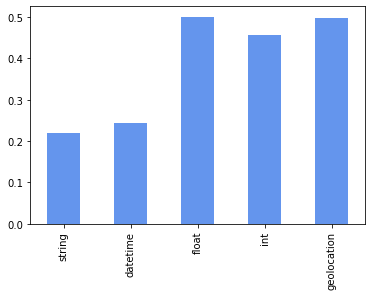

In [74]:
(real_new[real_new['label']!= real_new['tinybert_pred']].data_type.value_counts() / real_new.data_type.value_counts()).plot(kind='bar', color='cornflowerblue')

<AxesSubplot:>

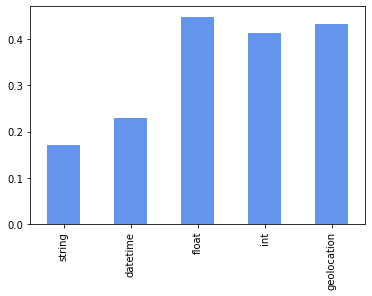

In [75]:
(real_new[real_new['label']!= real_new['roberta_pred']].data_type.value_counts() / real_new.data_type.value_counts()).plot(kind='bar',color='cornflowerblue')

<AxesSubplot:>

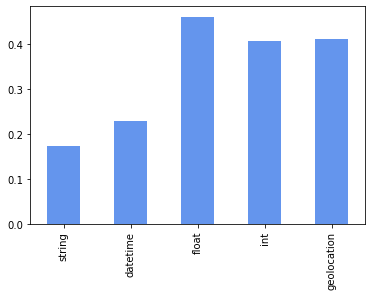

In [76]:
(real_new[real_new['label']!= real_new['bert_pred']].data_type.value_counts() / real_new.data_type.value_counts()).plot(kind='bar',color='cornflowerblue')

<AxesSubplot:>

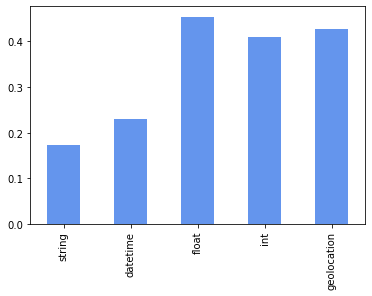

In [77]:
(real_new[real_new['label']!= real_new['distilbert_pred']].data_type.value_counts() / real_new.data_type.value_counts()).plot(kind='bar',color='cornflowerblue')

In [78]:
real_new

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred,data_type,filename,index
0,Comedy Improv at Arts Garage 2020-12-10 Shows ...,130,135,130,130,130,string,Event_stats.csv,nameEvent
1,Inspirada Fall Community Garage Sale Grand Ope...,130,130,130,130,130,string,Event_stats.csv,nameEvent
2,Safer Recruitment Refresher Half Day Training ...,130,130,130,130,130,string,Event_stats.csv,nameEvent
3,Ladies Lunch Presentation Night 70 Years Coope...,130,130,130,130,130,string,Event_stats.csv,nameEvent
4,Norwich Book Store - Frank Toms talks about hi...,130,130,130,130,130,string,Event_stats.csv,nameEvent
...,...,...,...,...,...,...,...,...,...
49599,2020-10-29T07 30 00 000Z 2020-11-14T08 00 00 0...,62,68,68,68,68,datetime,Event_stats.csv,doortimeEvent
49600,2020-02-29T03 00 00 000Z 2020-02-15T04 30 00 0...,62,68,68,68,68,datetime,Event_stats.csv,doortimeEvent
49601,2019-12-29 17 00 00 2020-10-07 19 00 00 2019-0...,62,55,68,68,68,datetime,Event_stats.csv,doortimeEvent
49602,2020-10-31T02 00 00-07 00 2021-03-20T03 00 00-...,62,68,68,68,68,datetime,Event_stats.csv,doortimeEvent


When gtin numbers are confused, then often with other gtin numbers eg 85

In [79]:
real_new[real_new['label']==84]

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred,data_type,filename,index
39388,629269001179 0 629269000264 0 628055856535 0 ...,84,84,84,84,84,int,Product_stats.csv,gtin12Product
39389,831362001462 0 698231727393 0 90127685617 0 8...,84,85,85,85,85,int,Product_stats.csv,gtin12Product
39390,685349612338 0 685349604999 0 853017115768 0 6...,84,85,84,84,84,int,Product_stats.csv,gtin12Product
39391,735048124837 0 804763626459 0 48019200950 0 75...,84,127,85,85,85,int,Product_stats.csv,gtin12Product
39392,37733005156 0 37733007129 0 37733007723 0 3444...,84,85,85,85,85,int,Product_stats.csv,gtin12Product
...,...,...,...,...,...,...,...,...,...
39567,811886011352 811886011338 811886011024 8118860...,84,84,85,84,84,int,Product_stats.csv,gtin12Product
39568,075679872340 683904634870 602577047480 8143370...,84,84,84,84,84,int,Product_stats.csv,gtin12Product
39569,715191088859 728614687812 615293798352 7151910...,84,190,84,84,84,int,Product_stats.csv,gtin12Product
39570,8600053193 0 8600053193 0 8600053193 0 860005...,84,127,87,190,85,int,Product_stats.csv,gtin12Product


In [80]:
real_new[real_new['label']==85]

,text,label,tinybert_pred,roberta_pred,bert_pred,distilbert_pred,data_type,filename,index
43843,7321428469419 0 8032767441293 0 8032766030245...,85,85,85,85,85,int,Product_stats.csv,gtin13Product
43844,5400568165077 5400568164599 5400568169259 5400...,85,85,85,85,85,int,Product_stats.csv,gtin13Product
43845,5050293851815 605168520508 934048300108 93191...,85,127,85,85,84,int,Product_stats.csv,gtin13Product
43846,5021346418620 0 5021346407846 0 5021346392784...,85,85,85,85,85,int,Product_stats.csv,gtin13Product
43847,86428260332 0 84692204090 0 3760065138526 0 4...,85,85,85,85,85,int,Product_stats.csv,gtin13Product
...,...,...,...,...,...,...,...,...,...
44220,9354593061315 0 9354593140904 0 9354593105767 ...,85,85,85,85,85,int,Product_stats.csv,gtin13Product
44221,23114220003 0 5060472802439 0 5060475073713 0 ...,85,84,85,85,85,int,Product_stats.csv,gtin13Product
44222,7081477964067 0 7081477606370 0 7081443227127 ...,85,85,85,84,84,int,Product_stats.csv,gtin13Product
44223,3760271272212 3760271270553 3760271272700 3760...,85,85,85,85,85,int,Product_stats.csv,gtin13Product


In [81]:
# distinguish classes -> Hotel etc. 
# avrg f1 score per class -> comparable ?

In [82]:
real_new.filename

0        Event_stats.csv
1        Event_stats.csv
2        Event_stats.csv
3        Event_stats.csv
4        Event_stats.csv
              ...       
49599    Event_stats.csv
49600    Event_stats.csv
49601    Event_stats.csv
49602    Event_stats.csv
49603    Event_stats.csv
Name: filename, Length: 49604, dtype: object

In [83]:
products = real_new[real_new['filename']=='Product_stats.csv']

In [84]:
f1_score(products.label, products.tinybert_pred, average='micro')

0.8125679968667043

In [85]:
f1_score(products.label, products.roberta_pred, average='micro')

0.8576961573610689

In [86]:
f1_score(products.label, products.bert_pred, average='micro')

0.857870229339832

In [87]:
f1_score(products.label, products.distilbert_pred, average='micro')

0.8582618912920492

In [88]:
recipe = real_new[real_new['filename']=='Recipe_stats.csv']
creativework = real_new[real_new['filename']=='CreativeWork_stats.csv']
event = real_new[real_new['filename']=='Event_stats.csv']
musicrecording = real_new[real_new['filename']=='MusicRecording_stats.csv']
localbusiness = real_new[real_new['filename']=='LocalBusiness_stats.csv']
person = real_new[real_new['filename']=='Person_stats.csv']
hotel = real_new[real_new['filename']=='Hotel_stats.csv']
book = real_new[real_new['filename']=='Book_stats.csv']
place = real_new[real_new['filename']=='Place_stats.csv']
restaurant = real_new[real_new['filename']=='Restaurant_stats.csv']
musicalbum = real_new[real_new['filename']=='MusicAlbum_stats.csv']
tvepisode = real_new[real_new['filename']=='TVEpisode_stats.csv']

In [89]:
f1_score(recipe.label, recipe.tinybert_pred, average='micro')

0.8155910543130992

In [90]:
f1_score(recipe.label, recipe.roberta_pred, average='micro')

0.8518849840255591

In [91]:
f1_score(recipe.label, recipe.bert_pred, average='micro')

0.8479233226837061

In [92]:
f1_score(recipe.label, recipe.distilbert_pred, average='micro')

0.8506070287539936

In [66]:
f1_score(creativework.label, creativework.tinybert_pred, average='micro')

0.40106266031513377

In [93]:
f1_score(creativework.label, creativework.roberta_pred, average='micro')

0.4301942103334555

In [94]:
f1_score(creativework.label, creativework.bert_pred, average='micro')

0.4115060461707586

In [95]:
f1_score(creativework.label, creativework.distilbert_pred, average='micro')

0.41791865152070357

In [99]:
f1_score(event.label, event.tinybert_pred, average='micro')

0.870832239432922

In [96]:
f1_score(event.label, event.roberta_pred, average='micro')

0.9104751903386715

In [97]:
f1_score(event.label, event.bert_pred, average='micro')

0.917038592806511

In [98]:
f1_score(event.label, event.distilbert_pred, average='micro')

0.910212654239958

In [68]:
f1_score(musicrecording.label, musicrecording.tinybert_pred, average='micro')


0.8800863131935882

In [100]:
f1_score(musicrecording.label, musicrecording.roberta_pred, average='micro')


0.9318742293464858

In [101]:
f1_score(musicrecording.label, musicrecording.bert_pred, average='micro')


0.9294081381011098

In [102]:
f1_score(musicrecording.label, musicrecording.distilbert_pred, average='micro')


0.9269420468557337

In [69]:
f1_score(localbusiness.label, localbusiness.tinybert_pred, average='micro')


0.6602764155149353

In [104]:
f1_score(localbusiness.label, localbusiness.roberta_pred, average='micro')


0.7806509139545253

In [105]:
f1_score(localbusiness.label, localbusiness.bert_pred, average='micro')


0.7940258582255907

In [106]:
f1_score(localbusiness.label, localbusiness.distilbert_pred, average='micro')


0.7837717342844405

In [70]:
f1_score(person.label, person.tinybert_pred, average='micro')


0.8201107011070111

In [107]:
f1_score(person.label, person.roberta_pred, average='micro')


0.8404059040590407

In [108]:
f1_score(person.label, person.bert_pred, average='micro')


0.8477859778597786

In [109]:
f1_score(person.label, person.distilbert_pred, average='micro')


0.8380996309963099

In [71]:
f1_score(hotel.label, hotel.tinybert_pred, average='micro')


0.5170340681362725

In [110]:
f1_score(hotel.label, hotel.roberta_pred, average='micro')


0.5290581162324649

In [111]:
f1_score(hotel.label, hotel.bert_pred, average='micro')


0.531062124248497

In [112]:
f1_score(hotel.label, hotel.distilbert_pred, average='micro')


0.5370741482965932

In [72]:
f1_score(book.label, book.tinybert_pred, average='micro')


0.6572769953051644

In [113]:
f1_score(book.label, book.roberta_pred, average='micro')


0.7300469483568076

In [114]:
f1_score(book.label, book.bert_pred, average='micro')


0.7230046948356808

In [115]:
f1_score(book.label, book.distilbert_pred, average='micro')


0.7065727699530516

In [73]:
f1_score(place.label, place.tinybert_pred, average='micro')


0.5318627450980392

In [116]:
f1_score(place.label, place.roberta_pred, average='micro')


0.5882352941176471

In [117]:
f1_score(place.label, place.bert_pred, average='micro')


0.5906862745098039

In [118]:
f1_score(place.label, place.distilbert_pred, average='micro')


0.625

In [74]:
f1_score(restaurant.label, restaurant.tinybert_pred, average='micro')

0.37362637362637363

In [119]:
f1_score(restaurant.label, restaurant.roberta_pred, average='micro')

0.31868131868131866

In [120]:
f1_score(restaurant.label, restaurant.bert_pred, average='micro')

0.2857142857142857

In [121]:
f1_score(restaurant.label, restaurant.distilbert_pred, average='micro')

0.3598901098901099

In [75]:
f1_score(musicalbum.label, musicalbum.tinybert_pred, average='micro')

0.49107142857142855

In [122]:
f1_score(musicalbum.label, musicalbum.roberta_pred, average='micro')

0.5625

In [123]:
f1_score(musicalbum.label, musicalbum.bert_pred, average='micro')

0.5625

In [124]:
f1_score(musicalbum.label, musicalbum.distilbert_pred, average='micro')

0.5803571428571429

In [126]:
f1_score(tvepisode.label, tvepisode.tinybert_pred, average='micro')

0.6086956521739131

In [127]:
f1_score(tvepisode.label, tvepisode.roberta_pred, average='micro')

0.7536231884057971

In [128]:
f1_score(tvepisode.label, tvepisode.bert_pred, average='micro')

0.7391304347826085

In [129]:
f1_score(tvepisode.label, tvepisode.distilbert_pred, average='micro')

0.7391304347826085